In [15]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
 
%matplotlib inline

In [16]:
# Import data
dataframe = pd.read_csv('dados.csv')

dataframe.sort_values(by=['SALARIO_BASE_FY_ATUAL'], ascending=False).head(5)

,ID,EMAIL,GPN,NOME,SALARIO_BASE_FY_ATUAL,EMPLOYEE_STATUS,PAIS,GENDER,LOCATION_CITY,SERVICE_LINE,...,LAST_PROMOTION_DATE,UTILIZAÇAO,PROMOÇAO,LEAD_ATUAL,RANK_FUTURO,EXP_LEVEL_FUTURO,ACTUAL,SMUS_ID,JOBS_ID,LEVEL
0,1,BR110101010@ey.com.br,BR110101010,Eric Messina,1000,Active,Brasil,M,São Paulo,Advisory,...,NaN,0.749536,Progression,NaN,44-Staff/Assistant,1,0,6,1,1
896,897,BR912275330@ey.com.br,BR912275330,Charles Avilla,1000,Active,Brasil,F,São Paulo,Advisory,...,1/21/2020 0:00,0.459560,Progression,NaN,44-Staff/Assistant,1,0,9,1,0
894,895,BR996841740@ey.com.br,BR996841740,William Nichols,1000,Active,Brasil,F,Belo Horizonte,Advisory,...,3/19/2020 0:00,0.299972,Promotion,Progressing,42-Senior,3,0,4,1,0
893,894,BR1329653660@ey.com.br,BR1329653660,Marilyn Chiquito,1000,Active,Brasil,F,Curitiba,Advisory,...,4/9/2020 0:00,0.640434,Progression,Progressing,44-Staff/Assistant,3,0,9,1,0
892,893,BR1019866830@ey.com.br,BR1019866830,Roy Borrero,1000,Active,Brasil,F,Curitiba,Advisory,...,12/14/2020 0:00,0.693005,Progression,Progressing,21-Senior Manager,2,0,7,3,0


In [17]:
dataframe.columns

Index(['ID', 'EMAIL', 'GPN', 'NOME', 'SALARIO_BASE_FY_ATUAL',
       'EMPLOYEE_STATUS', 'PAIS', 'GENDER', 'LOCATION_CITY', 'SERVICE_LINE',
       'SUB_SL', 'RANK_ATUAL', 'EXP_LEV_ATUAL', 'JOB_TITLE', 'HIRING_DATE',
       'PROPORCIONAL_HIRING_DATE', 'LAST_PROMOTION_DATE', 'UTILIZAÇAO',
       'PROMOÇAO', 'LEAD_ATUAL', 'RANK_FUTURO', 'EXP_LEVEL_FUTURO', 'ACTUAL',
       'SMUS_ID', 'JOBS_ID', 'LEVEL'],
      dtype='object')

## Analisando os dados
Dado alvo: PROMOÇAO

<AxesSubplot:xlabel='PROMOÇAO', ylabel='EXP_LEV_ATUAL'>

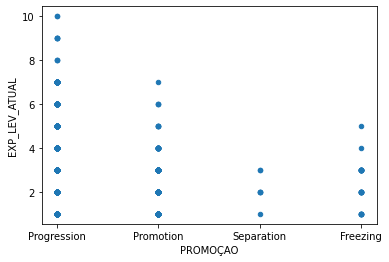

In [18]:
dataframe.plot.scatter('PROMOÇAO', 'EXP_LEV_ATUAL')

In [19]:
dataframe.isnull().sum()

ID                            0
EMAIL                         0
GPN                           0
NOME                          0
SALARIO_BASE_FY_ATUAL         0
EMPLOYEE_STATUS               0
PAIS                          0
GENDER                        0
LOCATION_CITY                 0
SERVICE_LINE                  0
SUB_SL                        0
RANK_ATUAL                    0
EXP_LEV_ATUAL                 0
JOB_TITLE                     0
HIRING_DATE                   0
PROPORCIONAL_HIRING_DATE      0
LAST_PROMOTION_DATE           1
UTILIZAÇAO                    0
PROMOÇAO                      0
LEAD_ATUAL                  228
RANK_FUTURO                   0
EXP_LEVEL_FUTURO              0
ACTUAL                        0
SMUS_ID                       0
JOBS_ID                       0
LEVEL                         0
dtype: int64

## Limpando os dados

In [20]:
dataframe['LEAD_ATUAL'].fillna(0, inplace=True)
dataframe['LAST_PROMOTION_DATE'].fillna(0, inplace=True)
dataframe.isnull().sum()

ID                          0
EMAIL                       0
GPN                         0
NOME                        0
SALARIO_BASE_FY_ATUAL       0
EMPLOYEE_STATUS             0
PAIS                        0
GENDER                      0
LOCATION_CITY               0
SERVICE_LINE                0
SUB_SL                      0
RANK_ATUAL                  0
EXP_LEV_ATUAL               0
JOB_TITLE                   0
HIRING_DATE                 0
PROPORCIONAL_HIRING_DATE    0
LAST_PROMOTION_DATE         0
UTILIZAÇAO                  0
PROMOÇAO                    0
LEAD_ATUAL                  0
RANK_FUTURO                 0
EXP_LEVEL_FUTURO            0
ACTUAL                      0
SMUS_ID                     0
JOBS_ID                     0
LEVEL                       0
dtype: int64

## Separando os Dados
Criando um dataframe apenas com as colunas que serão utilizadas na análise

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


inputs = dataframe.drop(['PROMOÇAO'], axis=1)
outputs = dataframe['PROMOÇAO']

# Cleaning Outputs
labelEncoderPromocao = LabelEncoder()
outputs = labelEncoderPromocao.fit_transform(outputs)

# Cleaning Inputs
scaler = MinMaxScaler(feature_range=(0,1))

labelEncoderGender = LabelEncoder()
inputs['GENDER'] = labelEncoderGender.fit_transform(inputs['GENDER'])

labelEncoderSubSl = LabelEncoder()
inputs['SUB_SL'] = labelEncoderSubSl.fit_transform(inputs['SUB_SL'])

Create function to transform data

In [22]:
cols = ['EXP_LEV_ATUAL', 'PROPORCIONAL_HIRING_DATE', 'EXP_LEVEL_FUTURO', 'GENDER', 'SUB_SL']

def transform_dataframe(df):
    df['GENDER'] = labelEncoderGender.transform(df['GENDER'])
    df['SUB_SL'] = labelEncoderSubSl.transform(df['SUB_SL'])

    return df

## Spliting Data
Splint data in X and Y variables

In [23]:
X = inputs[cols]
Y = outputs

### Linear Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_train, y_train)

print('Accuracy of Linear Regression classifier on training set: {:.2f}'
     .format(lin_model.score(X_train, y_train)))
print('Accuracy of Linear Regression classifier on test set: {:.2f}'
     .format(lin_model.score(X_test, y_test)))

Accuracy of Linear Regression classifier on training set: 0.06
Accuracy of Linear Regression classifier on test set: 0.09


### Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.69
Accuracy of Logistic regression classifier on test set: 0.68


### Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.27
Accuracy of GNB classifier on test set: 0.27


## Testing - Predict "Promoção"

In [27]:
df_apt_test = pd.DataFrame(np.array([ [0.833333, 1, 0, 'M', 'Risk'] ]), columns=cols)
df_apt_test_cleaned = transform_dataframe(df_apt_test)

y_predict_lin_model = lin_model.predict(df_apt_test_cleaned)
print(f"Predict Linear Regression: {y_predict_lin_model[0]}") # I's impossible to convert

y_predict_logreg = logreg.predict(df_apt_test_cleaned)
print(f"Predict Logistic Regression: {labelEncoderPromocao.inverse_transform([y_predict_logreg[0]])}")

y_predict_gnb = gnb.predict(df_apt_test_cleaned)
print(f"Predict Gaussian Naive Bayes: {labelEncoderPromocao.inverse_transform([y_predict_gnb[0]])}")

Predict Linear Regression: 1.560213139918864
Predict Logistic Regression: ['Promotion']
Predict Gaussian Naive Bayes: ['Progression']
